# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
### Business Goal
 
   1. Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
   2. It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Import the Libraries

In [1]:
# import libraries for importing the dataset
import pandas as pd
import numpy as np

# import libraries for visualising the data
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries to split the dataset into train data and test data
import sklearn
from sklearn.model_selection import train_test_split

# import libraries for rescaling the features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# import library to create linear regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import library to ignore the warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Check the shape of the dataset
bikes.shape

(730, 16)

In [4]:
#Check the datatypes and missing values in the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Dataset does not contain any null objects

In [5]:
# Check the min, 25%, 50%, 75%, max
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check thecolumns of the dataset
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Check the size of the data
bikes.size

11680

In [8]:
# Converting the 'season' column values 1,2,3,4 into string categorical values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
# Converting the 'weathersit' column values 1,2,3,4 into string categorical values

bikes['weathersit'] = bikes['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

In [10]:
# Converting the 'yr' column values 0 and 1 into string values 2018 and 2019 respectively

bikes['yr'] = bikes['yr'].map({0:'2018', 1:'2019'})

In [11]:
# Converting the 'mnth' column values 1 to 12 into Jan to Dec respectively

bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [12]:
# Converting 'weekday' column values 0 and 6 into string  values Monday to Sunday

bikes['weekday'] = bikes['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

#### Dropping the Columns
 - instant :  This column is it is just an index and it has no significant influence on the demand
 - casual and registered : These columns are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.
 - dteday : This column can be removed as we have some of date features like mnth and yr and weekday already in other columns.

In [13]:
# Before dropping dteday, let us introduce a No_of_days column which indicates how old is the business

bikes['No_of_days'] = (pd.to_datetime(bikes['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

<Figure size 864x576 with 0 Axes>

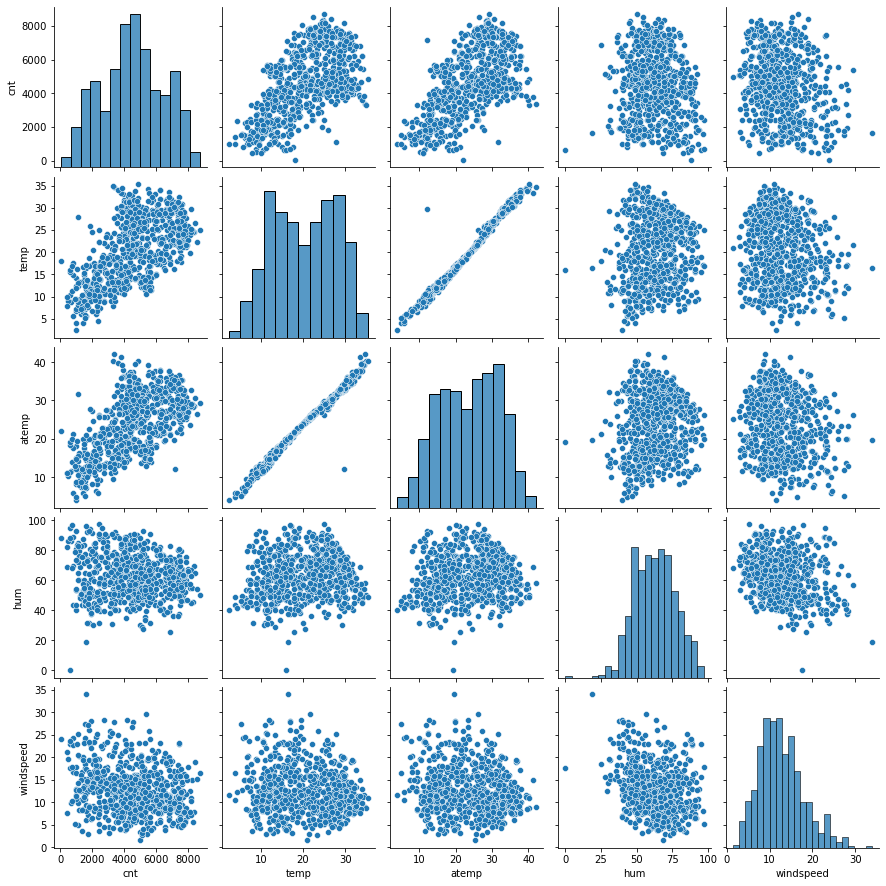

In [14]:
# Draw pairplots for continuous numeric variables using seaborn to check the linear relationship

plt.figure(figsize = (12,8))
sns.pairplot(data=bikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related to each other. Hence any of the variables can be dropped

In [15]:
bikes.drop(['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)

In [16]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,No_of_days
0,spring,2018,Jan,0,Tuesday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985,0
1,spring,2018,Jan,0,Wednesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801,1
2,spring,2018,Jan,0,Thursday,1,Clear,8.050924,43.7273,16.636703,1349,2
3,spring,2018,Jan,0,Friday,1,Clear,8.200000,59.0435,10.739832,1562,3
4,spring,2018,Jan,0,Saturday,1,Clear,9.305237,43.6957,12.522300,1600,4


In [17]:
# Check the datatypes of the columns
bikes.dtypes

season         object
yr             object
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
No_of_days      int64
dtype: object

In [18]:
bikes.describe()

,holiday,workingday,temp,hum,windspeed,cnt,No_of_days
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,364.500000
std,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,182.250000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,364.500000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,729.000000


## Visualise the data

 - Let's make a pairplot for all the numerical variables in the dataset

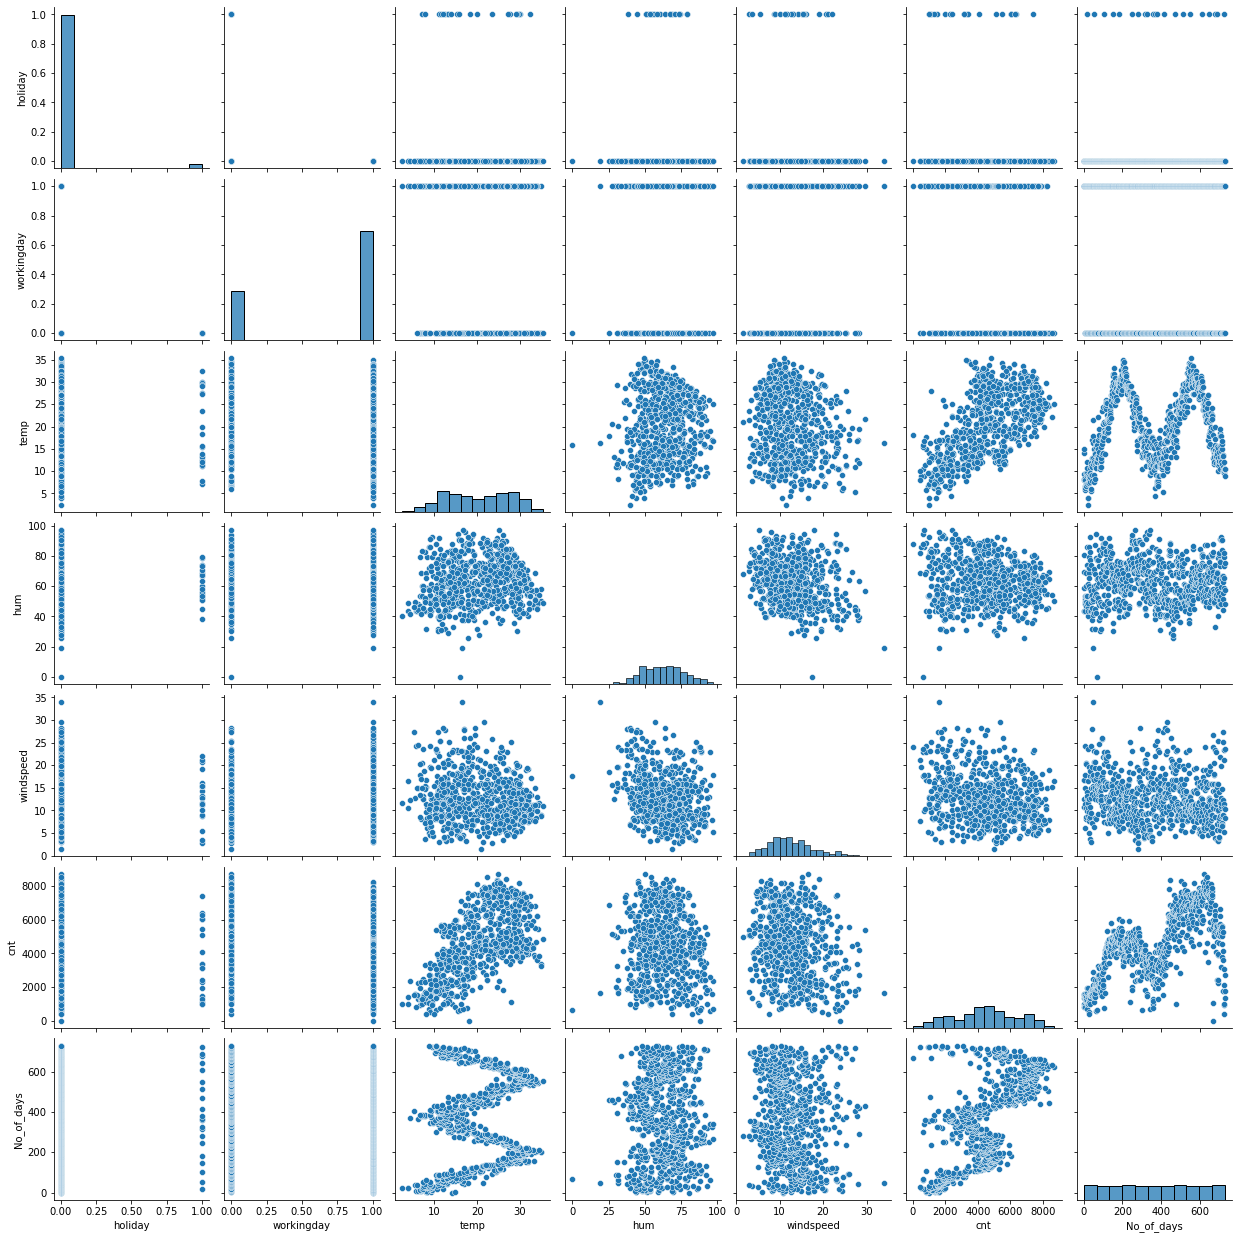

In [19]:
sns.pairplot(bikes)
plt.show()

- Let's make a box plot for the categorical variables in the dataset

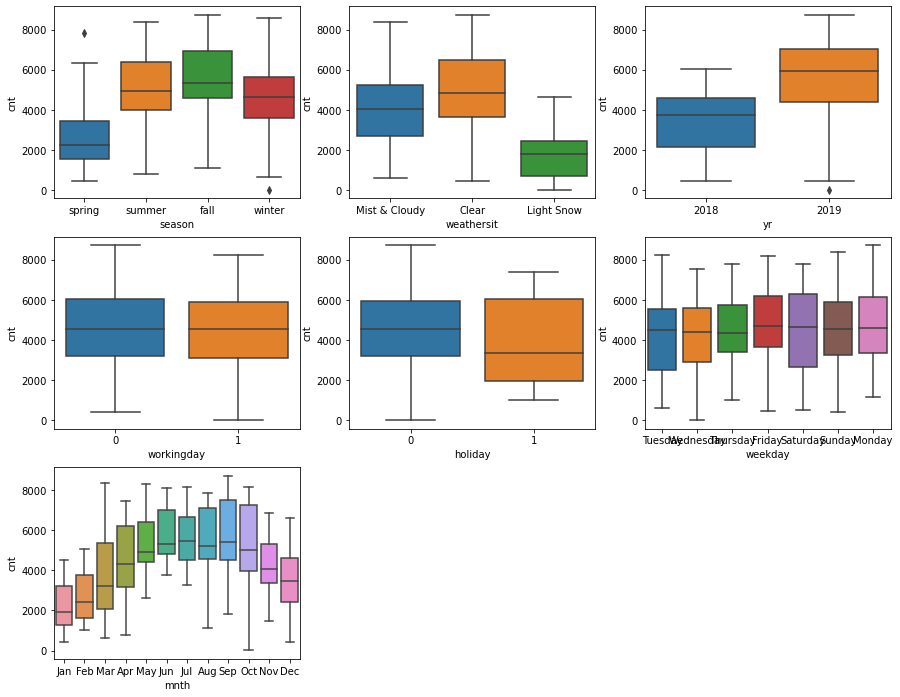

In [20]:
#Plotting the categorical variables against cnt variable

plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data= bikes)

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data= bikes)

plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data= bikes)

plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data= bikes)

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data= bikes)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data= bikes)

plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data= bikes)

plt.show()

#### Observations

- "fall" Season has highest demand for rental bikes
- The clear weathersit has highest demand
- I see that demand for 2019 has grown
- When there is a holiday, demand has decreased.
- Weekday is not giving clear picture abount demand.
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
- During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

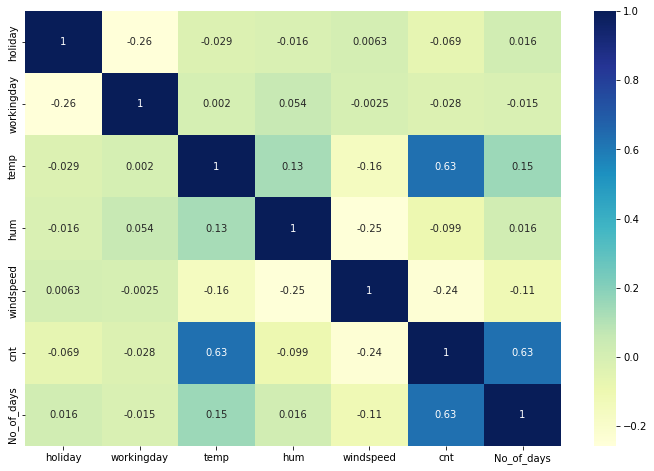

In [21]:
# Check the correlation between the numerical variables

plt.figure(figsize=(12,8))
sns.heatmap(bikes.corr(), cmap="YlGnBu", annot = True)
plt.show()

- temp and No_of_days variables are highly correlated with target variable "cnt"

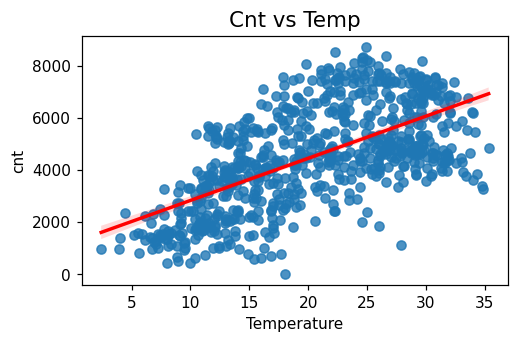

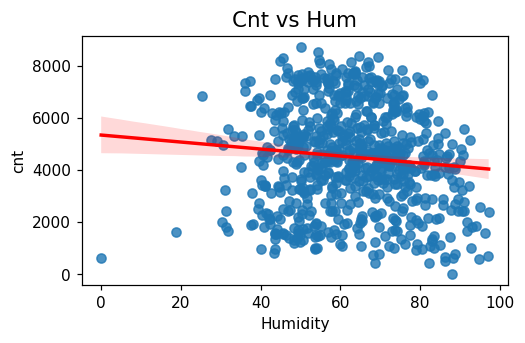

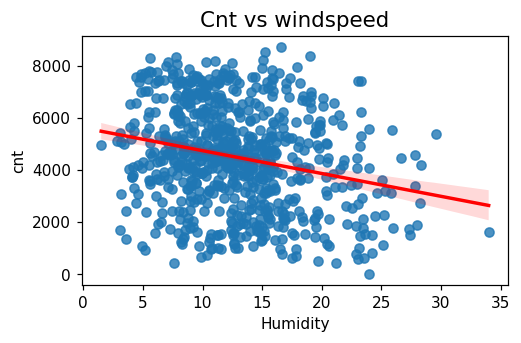

In [22]:
# Check the regplot between cnt and temp

plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=14)
sns.regplot(data=bikes,y="cnt",x="temp",line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

# Check the regplot between cnt and hum

plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Hum",fontsize=14)
sns.regplot(data=bikes,y="cnt",x="hum",line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.show()

# Check the regplot between cnt and windspeed

plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs windspeed",fontsize=14)
sns.regplot(data=bikes,y="cnt",x="windspeed",line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.show()

- Demand for bikes is positively correlated to temp. We can see that cnt is linearly increasing with temp.
- Humidity and Windspeed values are more scattered around. We can see that cnt is decreasing with increase in humidity and windspeed.

## Create Dummy Variables for all the categorical variables

1. Dummy Variables for Season : 
   - 000 will correspond to fall
   - 001 will correspond to winter
   - 010 will correspond to summer
   - 100 will correspond to spring
   
   
2. Dummy Variables for yr : 
   - 0 will correspond to 2018
   - 1 will correspond to 2019
   
   
3. Dummy Variables for weathersit :
   - 00 will correspond to clear
   - 01 will correspond to Mist & Cloudy
   - 10 will correspond to Light Snow
   
   
4. Dummy Variables for weekday :
   - 100000 will correspond to Monday
   - 000010 will correspond to Tuesday
   - 000001 will correspond to Wednesday
   - 000100 will correspond to Thursday
   - 000000 will correspond to Friday
   - 010000 will correspond to Saturday
   - 001000 will correspond to Sunday
  
  
5. Dummy Variables for mnth :
   - 00010000000 will correspond to Jan
   - 00100000000 will correspond to Feb
   - 00000010000 will correspond to Mar
   - 00000000000 will correspond to Apr
   - 00000001000 will correspond to May
   - 00000100000 will correspond to Jun
   - 00001000000 will correspond to Jul
   - 10000000000 will correspond to Aug
   - 00000000001 will correspond to Sept
   - 00000000010 will correspond to Oct
   - 00000000100 will correspond to Nov
   - 01000000000 will correspond to Dec

In [23]:
# Create dummy variables for categorical variables

bikes = pd.get_dummies(data=bikes,columns=["season","mnth","weekday","weathersit","yr"],drop_first=True)

In [24]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   holiday                   730 non-null    int64  
 1   workingday                730 non-null    int64  
 2   temp                      730 non-null    float64
 3   hum                       730 non-null    float64
 4   windspeed                 730 non-null    float64
 5   cnt                       730 non-null    int64  
 6   No_of_days                730 non-null    int64  
 7   season_spring             730 non-null    uint8  
 8   season_summer             730 non-null    uint8  
 9   season_winter             730 non-null    uint8  
 10  mnth_Aug                  730 non-null    uint8  
 11  mnth_Dec                  730 non-null    uint8  
 12  mnth_Feb                  730 non-null    uint8  
 13  mnth_Jan                  730 non-null    uint8  
 14  mnth_Jul  

In [25]:
bikes

,holiday,workingday,temp,hum,windspeed,cnt,No_of_days,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy,yr_2019
0,0,1,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,14.902598,69.6087,16.652113,801,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,4,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,65.2917,23.458911,2114,725,1,0,0,...,0,0,1,0,0,0,0,0,1,1
726,0,0,10.386653,59.0000,10.416557,3095,726,1,0,0,...,0,0,0,1,0,0,0,0,1,1
727,0,0,10.386653,75.2917,8.333661,1341,727,1,0,0,...,0,1,0,0,0,0,0,0,1,1
728,0,1,10.489153,48.3333,23.500518,1796,728,1,0,0,...,0,0,0,0,0,1,0,0,0,1


### Split the dataset in to train and test set

In [26]:
# Create train set and test set

bikes_train, bikes_test = train_test_split(bikes, train_size= 0.7, random_state=100)

# Check the shape of the train set
print(bikes_train.shape)

# Check the shape of the test set
print(bikes_test.shape)

(510, 30)
(220, 30)


In [27]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt','No_of_days']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

In [28]:
# Check the min, 25%, 50%, 75%, max for train dataset

bikes_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,No_of_days,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.505055,0.243137,0.247059,0.247059,...,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.345098,0.507843
std,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.287907,0.429398,0.431725,0.431725,...,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475867,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.255838,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.510989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.757898,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
bikes_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,No_of_days,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy,yr_2019
576,0,1,0.815169,0.725633,0.264686,0.827658,0.791209,0,0,0,...,0,0,0,0,1,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0.585165,1,0,0,...,0,1,0,0,0,0,0,0,1,1
728,0,1,0.245101,0.498067,0.663106,0.204096,1.000000,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0.662088,0,1,0,...,0,1,0,0,0,0,0,0,1,1
111,0,0,0.345824,0.751824,0.380981,0.191095,0.152473,0,1,0,...,0,1,0,0,0,0,0,0,1,0


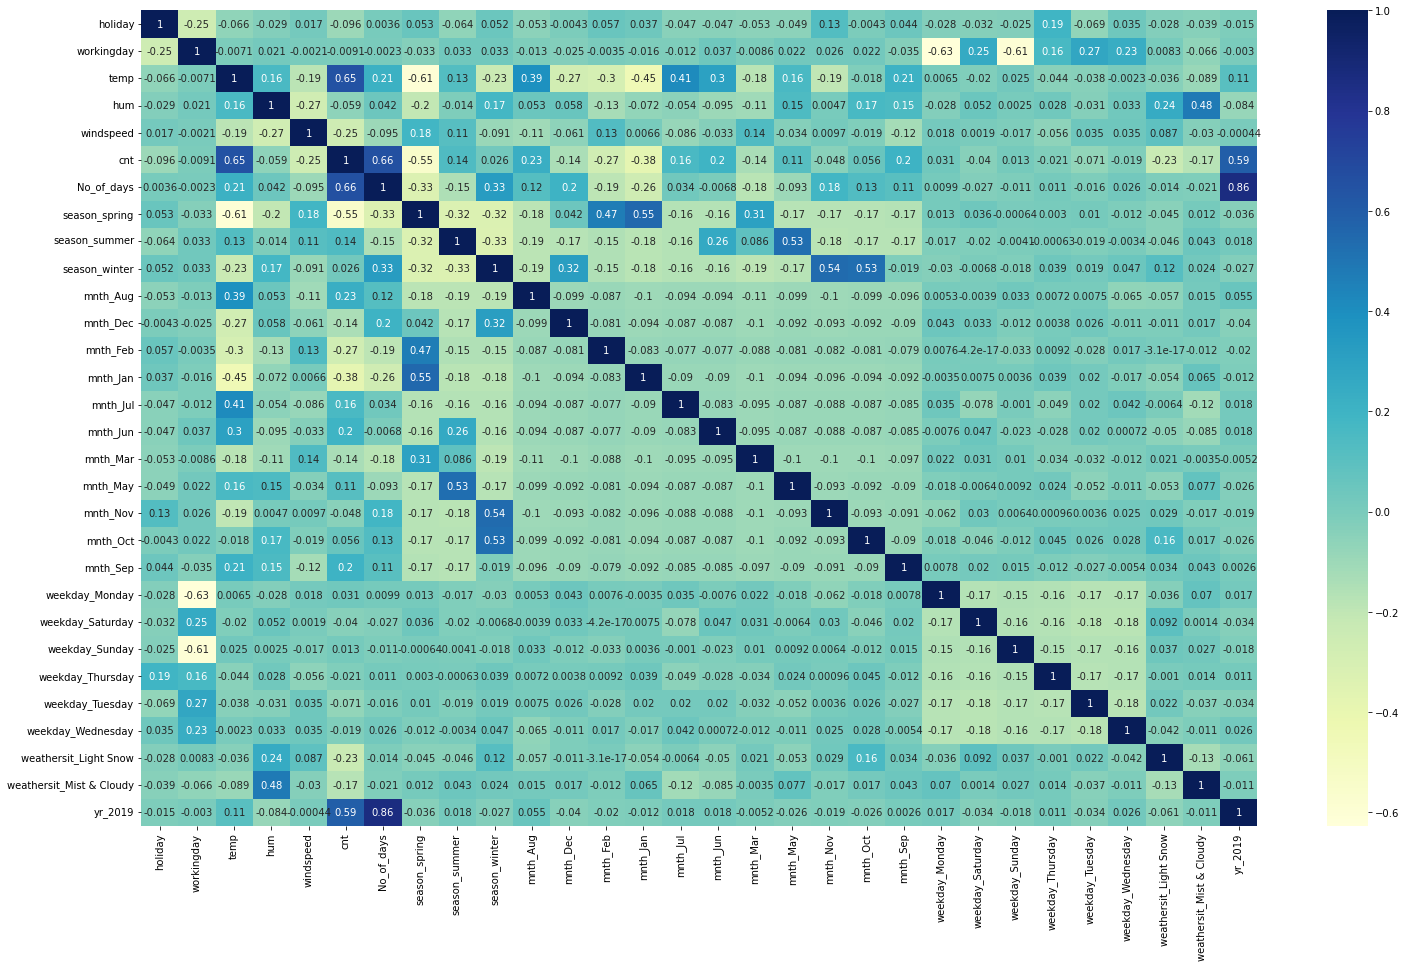

In [30]:
# Check the correlation to see which variables are highly co-related

plt.figure(figsize = (25, 15))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- No_of_days and yr_2019 are highly correlated 
- cnt and temp are highly correlated
- cnt and No_of_days are highly corre

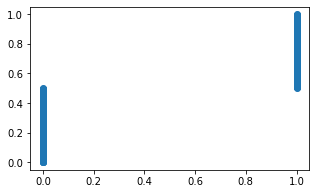

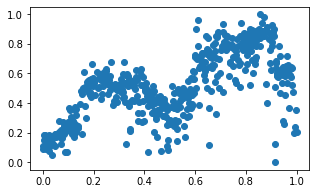

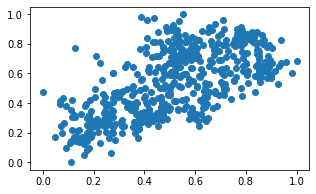

In [31]:
# Let's make scatterplot for No_of_days and yr_2019

plt.figure(figsize=[5,3])
plt.scatter(bikes_train.yr_2019, bikes_train.No_of_days)
plt.show()

# Let's make scatterplot for No_of_days and cnt

plt.figure(figsize=[5,3])
plt.scatter(bikes_train.No_of_days, bikes_train.cnt)
plt.show()

# Let's make scatterplot for cnt and temp

plt.figure(figsize=[5,3])
plt.scatter(bikes_train.cnt, bikes_train.temp)
plt.show()

#### Dividing the bikes_train data in to X and y sets for the model building

In [32]:
y_train=bikes_train.pop('cnt')
X_train=bikes_train

#### Build a linear model using RFE and Automated Approach

In [33]:
# Build a Linear Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

#Cut down number of features to 15 using automated approach
rfe = RFE(lm,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('No_of_days', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 12),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 13),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr_2019', True, 1)]

In [35]:
cols = X_train.columns[rfe.support_]
cols

Index(['holiday', 'temp', 'hum', 'windspeed', 'No_of_days', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Oct',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist & Cloudy',
       'yr_2019'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_spring', 'mnth_Dec', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

#### Building Linear model usin statsmodel, for the detailed statistics

In [37]:
X_train_rfe = X_train[['yr_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow', 'weathersit_Mist & Cloudy']]

In [38]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter

def build_model(cols):
    X_train_sm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [39]:
# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter

def get_vif(cols):
    bikes1 = X_train_rfe
    vif = pd.DataFrame()
    vif['features'] = bikes1.columns
    vif['VIF'] = [variance_inflation_factor(bikes1.values, i) for i in range(bikes1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [40]:
# Model1

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.13e-188
Time:                        11:48:11   Log-Likelihood:                 513.85
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     494   BIC:                            -927.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- Dropping the column "Weekday_Saturday"as it is having the high P-value

In [41]:
X_train_rfe.drop(['weekday_Saturday'], axis=1, inplace=True)

In [42]:
X_train_rfe.head()

,yr_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Light Snow,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1


In [43]:
# Model 2

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.31e-189
Time:                        11:48:20   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- mnth_Jan has the highest VIF. Hence it can be dropped

In [44]:
X_train_rfe.drop(['mnth_Jan'], axis=1, inplace=True)

In [45]:
# Model 3

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          5.30e-190
Time:                        11:48:23   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     496   BIC:                            -935.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- hum has the highest VIF hence it can be dropped

In [46]:
X_train_rfe.drop(['hum'], axis=1, inplace=True)

In [47]:
# Model 4

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.99e-187
Time:                        11:48:27   Log-Likelihood:                 501.64
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     497   BIC:                            -922.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- temp has the highest VIF hence it can be dropped

In [48]:
X_train_rfe.drop(['temp'], axis=1, inplace=True)

In [49]:
# Model 5

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          6.96e-149
Time:                        11:48:30   Log-Likelihood:                 408.46
No. Observations:                 510   AIC:                            -792.9
Df Residuals:                     498   BIC:                            -742.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- mnth_Jul has the highest p-value hence it can be dropped.

In [50]:
X_train_rfe.drop(['mnth_Jul'], axis=1, inplace=True)

In [51]:
# Model 6

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          6.39e-150
Time:                        11:48:33   Log-Likelihood:                 408.27
No. Observations:                 510   AIC:                            -794.5
Df Residuals:                     499   BIC:                            -748.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- The P-value of all variables shows that they are significant.
- The VIF of features are now within limit (VIF<5).

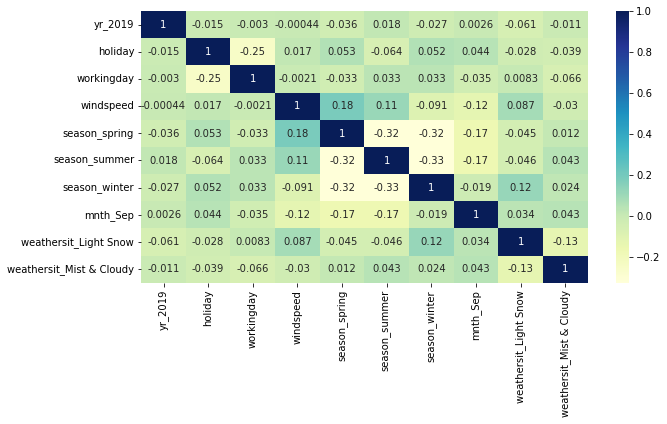

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train_rfe.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [53]:
final_col = ['windspeed', 'workingday', 'season_spring', 'season_summer', 'yr_2019', 'season_winter', 'weathersit_Mist & Cloudy', 'mnth_Sep', 'holiday', 'weathersit_Light Snow']

In [54]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lm1 = LinearRegression()
    lm1.fit(X,y)
    return lm1

In [55]:
#Build a model with above columns
lm2 = build_model_sk(X_train[final_col],y_train)
print(lm2.intercept_,lm2.coef_)

0.596231623833088 [-0.17055054 -0.0236673  -0.29551282 -0.03921582  0.24708808 -0.07330589
 -0.09089049  0.07599992 -0.11777873 -0.29694295]


### Residual Analysis of Training Data

In [56]:
# Create predicted y-values
y_train_pred = lm2.predict(X_train[final_col])

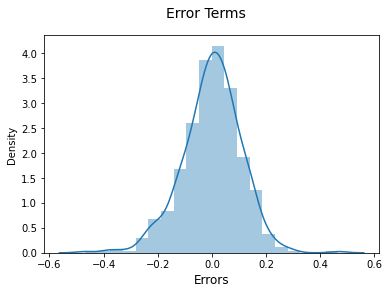

In [57]:
# Plot the histogram of the error terms
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.suptitle('Error Terms', fontsize=14)
plt.xlabel('Errors', fontsize=12)
plt.show()

 - Error Terms are normally distributed with mean zero

#### Check if the error terms are independent of each other

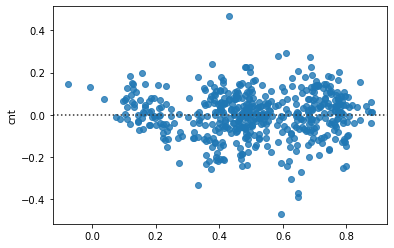

In [58]:
sns.residplot(x=y_train_pred, y=y_train - y_train_pred)
plt.show()

- Residual points are scattered equally above and below the line y=0. Hence this is normally distributed along the center
- This implies that our model is fit for linear regression
- Scatter plot shows that the assumption is true

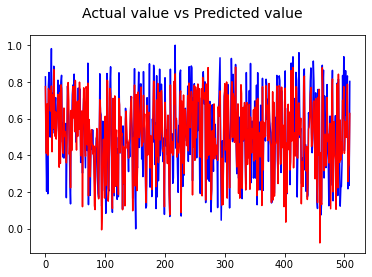

In [59]:
# Check the graph for actual and predicted values

a = [i for i in range(0,len(X_train),1)]
plt.plot(a,y_train, color="blue")
plt.plot(a,y_train_pred, color="red")
plt.suptitle('Actual value vs Predicted value', fontsize = 14)
plt.show()

- Actual and predicted values are almost following the same pattern. Hence the model is good

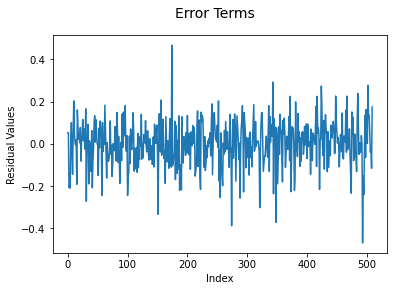

In [60]:
# Error Terms

a = [i for i in range(0,len(X_train),1)]
plt.plot(a,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 14)
plt.xlabel('Index')
plt.ylabel('Residual Values')
plt.show()

- Error terms are independent of each other

In [61]:
# Check the r2_score of training model

r2_score(y_train,y_train_pred)

0.7650834433775475

- r2_score is same as we obtained from the final model

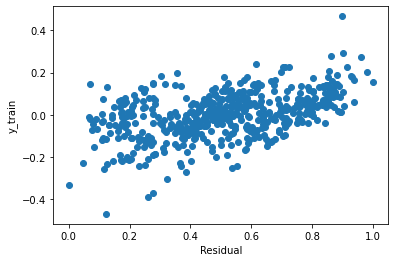

In [62]:
# Check the scatter plot 

residual = y_train - y_train_pred
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Prediction and Evaluation on Test Dataset

In [63]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt','No_of_days']

# Transform test set only as we did for training set
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

In [64]:
bikes_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,No_of_days,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy,yr_2019
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.490559,0.254545,0.263636,0.236364,...,0.086364,0.154545,0.131818,0.172727,0.159091,0.118182,0.122727,0.027273,0.318182,0.481818
std,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.294116,0.436599,0.441609,0.425817,...,0.281541,0.362295,0.339064,0.378873,0.366595,0.323559,0.328872,0.163248,0.466833,0.500809
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.004121,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.234203,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.480082,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.740041,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.001374,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Create predictor and target variable from test set

y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[final_col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions on the test set

y_test_pred = lm2.predict(X_test[final_col])

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

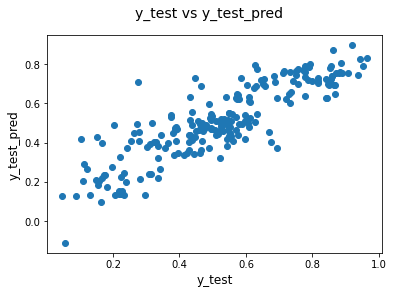

In [68]:
# Plotting y_test and y_pred to visualise the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=14)              
plt.xlabel('y_test', fontsize=12)                          
plt.ylabel('y_test_pred', fontsize=12)

- We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

#### Plot Test Vs Predicted Test 

In [69]:
# Function to plot Actual vs Predicted
# Takes Actual and Predicted values as input along with the scale and Title to indicate which data

def plot_act_pred(actual,pred,scale,dataname):
    a = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(a,actual, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(a,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=14)             
    plt.xlabel('Index', fontsize=12)                               
    plt.ylabel('Counts', fontsize=12)                               

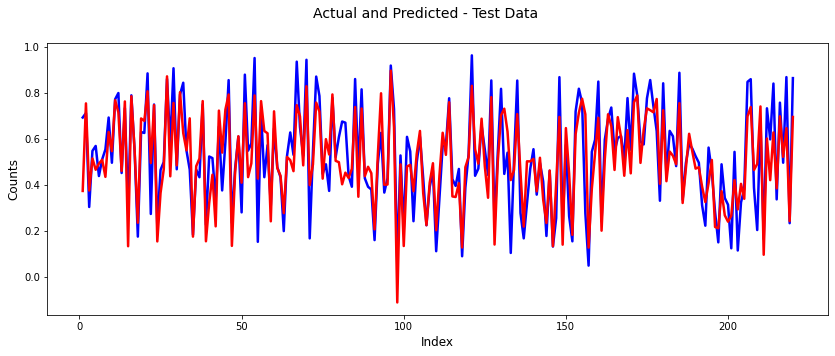

In [70]:
# Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [71]:
# Check the r2-score for test data

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7450260950622474

In [73]:
build_model(X_train_rfe)
get_vif(X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          6.39e-150
Time:                        11:53:27   Log-Likelihood:                 408.27
No. Observations:                 510   AIC:                            -794.5
Df Residuals:                     499   BIC:                            -748.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- We can see that r2_score of train set is 0.765 and the r2_score of test set is 0.745.
- From the r2_scores, we can clearly say that, what the model has realized in the training set, it is likewise ready to sum up on the test set.

### Final Equation can be

#### cnt = 0.2471 x yr_2019-0.1178 x holiday-0.0237 x workingday-0.1706 x windspeed-0.2955 x season_spring-0.0392 x season_summer-0.0733 x season_winter+0.0760 x mnth_Sep-0.2969 x weathersit_Light Snow-0.0909 x weathersit_Mist & Cloudy